# Predicting Stock Prices with continuous input using Long Short Term Memory Networks

## Part 1  - Data Preprocessing


---

### Importing libraries

In [30]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt
%matplotlib inline

### Importing training set

In [31]:
training_set = pd.read_csv('Google_Stock_Price_Train.csv')

In [32]:
training_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [33]:
training_set = training_set.iloc[:,1:2].values

---

### Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)


In [35]:
X_train = training_set[0:1257]
y_train = training_set[1:1258]

---

### Reshaping

In [36]:
X_train = np.reshape(X_train, (1257, 1, 1))

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

---

### Building the RNN

In [38]:
regressor = Sequential()


In [39]:
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [40]:
regressor.add(Dense(units = 1))

In [41]:
# Compiling the RNN
# Compiling all the layers together.
# Loss helps in manipulation of weights in NN. 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# Number of epochs increased for better convergence.
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
1257/1257 [==============================] - 1s 810us/step - loss: 0.0886
Epoch 2/200
1257/1257 [==============================] - 0s 150us/step - loss: 0.0760
Epoch 3/200
1257/1257 [==============================] - 0s 122us/step - loss: 0.0719
Epoch 4/200
1257/1257 [==============================] - 0s 118us/step - loss: 0.0696
Epoch 5/200
1257/1257 [==============================] - 0s 129us/step - loss: 0.0676
Epoch 6/200
1257/1257 [==============================] - 0s 127us/step - loss: 0.0658
Epoch 7/200
1257/1257 [==============================] - 0s 120us/step - loss: 0.0640
Epoch 8/200
1257/1257 [==============================] - 0s 147us/step - loss: 0.0623
Epoch 9/200
1257/1257 [==============================] - 0s 125us/step - loss: 0.0605
Epoch 10/200
1257/1257 [==============================] - 0s 124us/step - loss: 0.0588
Epoch 11/200
1257/1257 [==============================] - 0s 134us/step - loss: 0.0571
Epoch 12/200
1257/1257 [============================

1257/1257 [==============================] - 0s 125us/step - loss: 3.3480e-04
Epoch 94/200
1257/1257 [==============================] - 0s 120us/step - loss: 3.3311e-04
Epoch 95/200
1257/1257 [==============================] - 0s 82us/step - loss: 3.3244e-04
Epoch 96/200
1257/1257 [==============================] - 0s 95us/step - loss: 3.2980e-04
Epoch 97/200
1257/1257 [==============================] - 0s 105us/step - loss: 3.3083e-04
Epoch 98/200
1257/1257 [==============================] - 0s 118us/step - loss: 3.2683e-04
Epoch 99/200
1257/1257 [==============================] - 0s 114us/step - loss: 3.2670e-04
Epoch 100/200
1257/1257 [==============================] - 0s 118us/step - loss: 3.2291e-04
Epoch 101/200
1257/1257 [==============================] - 0s 126us/step - loss: 3.2081e-04
Epoch 102/200
1257/1257 [==============================] - 0s 141us/step - loss: 3.1969e-04
Epoch 103/200
1257/1257 [==============================] - 0s 119us/step - loss: 3.1691e-04
Epoch 104/

1257/1257 [==============================] - 0s 123us/step - loss: 2.5288e-04
Epoch 183/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.5338e-04
Epoch 184/200
1257/1257 [==============================] - 0s 117us/step - loss: 2.5301e-04
Epoch 185/200
1257/1257 [==============================] - 0s 129us/step - loss: 2.5750e-04
Epoch 186/200
1257/1257 [==============================] - 0s 127us/step - loss: 2.5564e-04
Epoch 187/200
1257/1257 [==============================] - 0s 114us/step - loss: 2.5183e-04
Epoch 188/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.5598e-04
Epoch 189/200
1257/1257 [==============================] - 0s 107us/step - loss: 2.5305e-04
Epoch 190/200
1257/1257 [==============================] - 0s 122us/step - loss: 2.5503e-04
Epoch 191/200
1257/1257 [==============================] - 0s 123us/step - loss: 2.5394e-04
Epoch 192/200
1257/1257 [==============================] - 0s 130us/step - loss: 2.5337e-04
Ep

---

# Part 3 - Making predictions and Visualizations

In [42]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

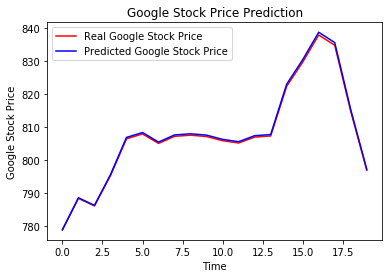

In [43]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [44]:
# Making predictions for the entire dataset
# Getting the real stock price of 2012 - 2016
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

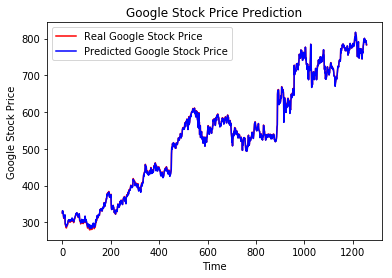

In [45]:
# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

---

# Part 4 - Evaluating RNN

In [46]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [47]:
print(rmse)

0.4736709465582201
